# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Rossmann store managers were  tasked to predict their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### We were provided with historical sales data for 1,115 Rossmann stores. The task was to forecast the "Sales" column for the test set. 


<b> Dataset Description </b>

We were provided with 2 datasets.

### Rossmann Stores Data.csv - historical data including Sales
###store.csv - supplemental information about the stores

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [4]:
df_store=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/capstone/capstone 2/store.csv')

In [5]:
df_sales=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/capstone/capstone 2/Rossmann Stores Data.csv')

Look at sales dataset , its datatype and handling missing data if any

In [ ]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_sales.shape

(1017209, 9)

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


df_sales datatset contains 9 columns and 1017209 rows . 

It dosent contain any null values.

In [ ]:
df_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df_sales.astype('object').describe()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
unique,1115,7,942,21734,4086,2,2,5,2
top,1115,5,2013-08-21,0,0,1,0,0,0
freq,942,145845,1115,172871,172869,844392,629129,855087,835488


In [6]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])


In [7]:
df_sales['Month']=df_sales.Date.dt.month
df_sales['Year']=df_sales.Date.dt.year
df_sales['Day']=df_sales.Date.dt.day

Look at sales dataset , its datatype and handling missing data if any

In [ ]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_store.shape

(1115, 10)

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Whwnever promo2 is 0 the next 3 columns have nan values .
Hence we replace those values with 0

In [8]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [ ]:
print(df_store.CompetitionOpenSinceMonth.mean())
print(df_store.CompetitionOpenSinceYear.mean())

7.2247043363994745
2008.6688567674114


Replace null values of remaining columns with the mean values of that particular columns

In [9]:
df_store.CompetitionOpenSinceMonth.fillna(7,inplace=True)
df_store.CompetitionOpenSinceYear.fillna(2008,inplace=True)
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].mean(), inplace=True)

In [ ]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.153363,2008.456502,0.512108,12.083408,1030.239462
std,322.01708,7652.849306,2.655365,5.127166,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,7.000000,2008.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
df_store.astype('object').describe()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,1115,1115,1115.0,1115.0,1115.0,1115,1115.0,1115.0,1115
unique,1115,4,3,655.0,12.0,23.0,2,25.0,8.0,4
top,1115,a,a,250.0,7.0,2008.0,1,0.0,0.0,0
freq,1,602,593,12.0,421.0,408.0,571,544.0,544.0,544



## <b> Merging both the datasets into one. </b>

In [10]:
df = pd.merge(df_sales, df_store, how = 'left', on = 'Store')
df.head() 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


We will substitute all the stateholiday as 1.

In [11]:
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [12]:
df['StateHoliday'] = df.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})



## <b> EXPLORATORY DATA ANALYSIS </b>

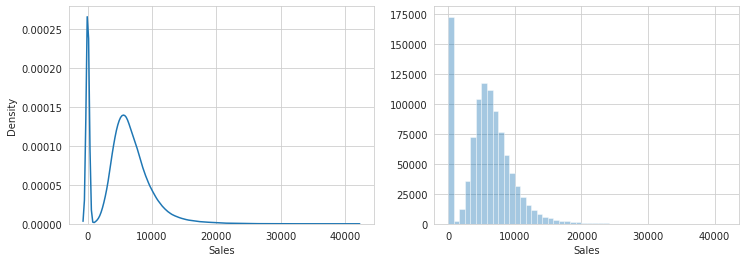

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.kdeplot(df['Sales'],data=df, ax=axes[0]);
sns.distplot(df['Sales'] , kde=False , bins=50 ,ax=axes[1]);

There is positive linear relationship between customers and sales.
ie.  more the no of customers more is the sales

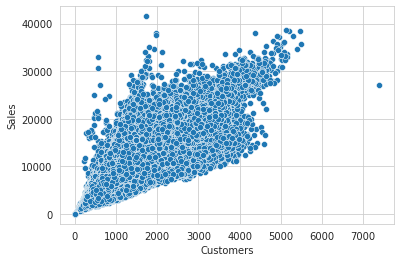

In [ ]:
sns.scatterplot(x='Customers' , y='Sales' , data=df)

Top 10 stores with maximum sales and top 10 stores with minimum sales

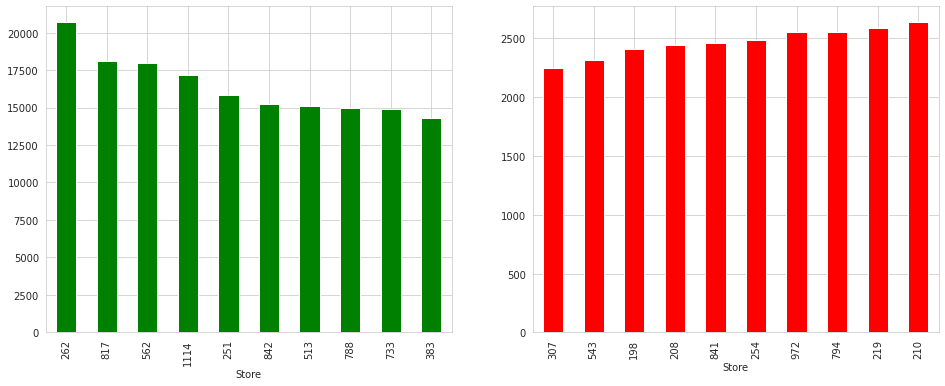

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

((df.groupby(['Store'])['Sales'].mean())).sort_values(ascending = False).head(10).plot.bar(color = 'green'  , ax=axes[0])
((df.groupby(['Store'])['Sales'].mean())).sort_values(ascending = True).head(10).plot.bar(color = 'red' , ax=axes[1])


Sales will only happen when store is open.

Hence we have to find factors which influence store to be closed

In [ ]:
df.groupby('Open')['Sales'].mean()

Open
0       0.000000
1    6955.514291
Name: Sales, dtype: float64

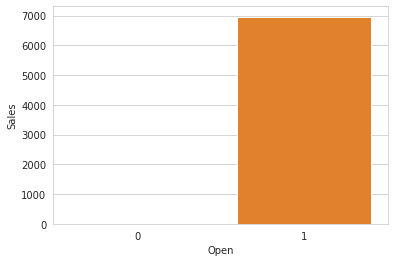

In [ ]:
sns.barplot(x='Open' , y='Sales' , data=df );

School holiday has very less impact weather the shop will remain open or close.
But state holiday has high impact weather store will be open or close and hence has high impact on sales

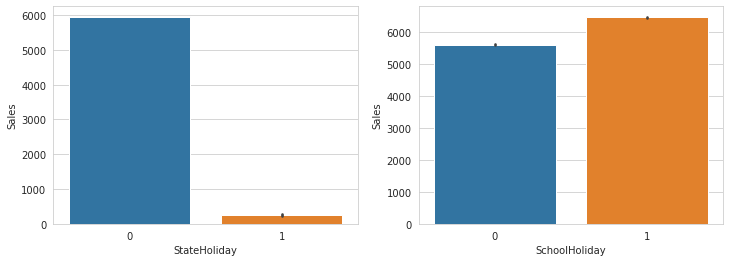

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(x='StateHoliday', y='Sales',data=df, ax=axes[0]);
sns.barplot(x='SchoolHoliday', y='Sales',data=df, ax=axes[1]);


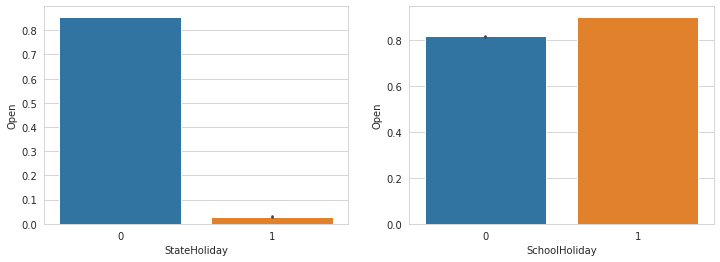

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(x='StateHoliday', y='Open',data=df, ax=axes[0]);
sns.barplot(x='SchoolHoliday', y='Open',data=df, ax=axes[1]);


On 7th day of week stores generally are closed due to sunday barring few stores . Hence sales on 7th day is also very less

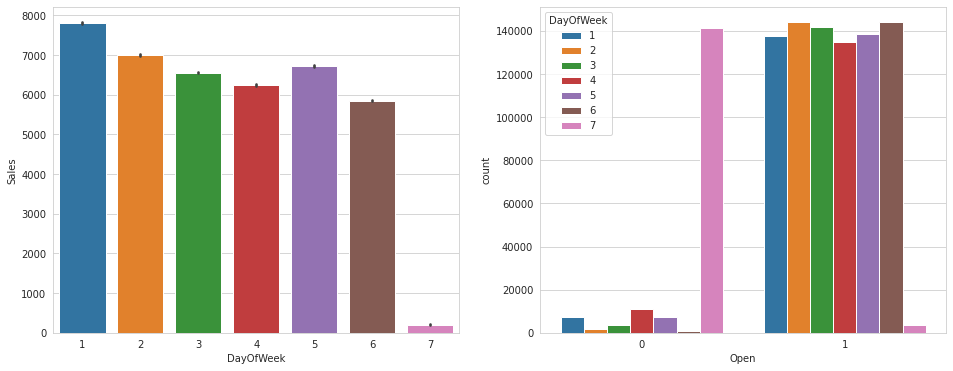

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x='DayOfWeek', y='Sales',data=df, ax=axes[0]);
sns.countplot(x='Open' , hue='DayOfWeek',data=df, ax=axes[1]);

Analysis based on day, month and year

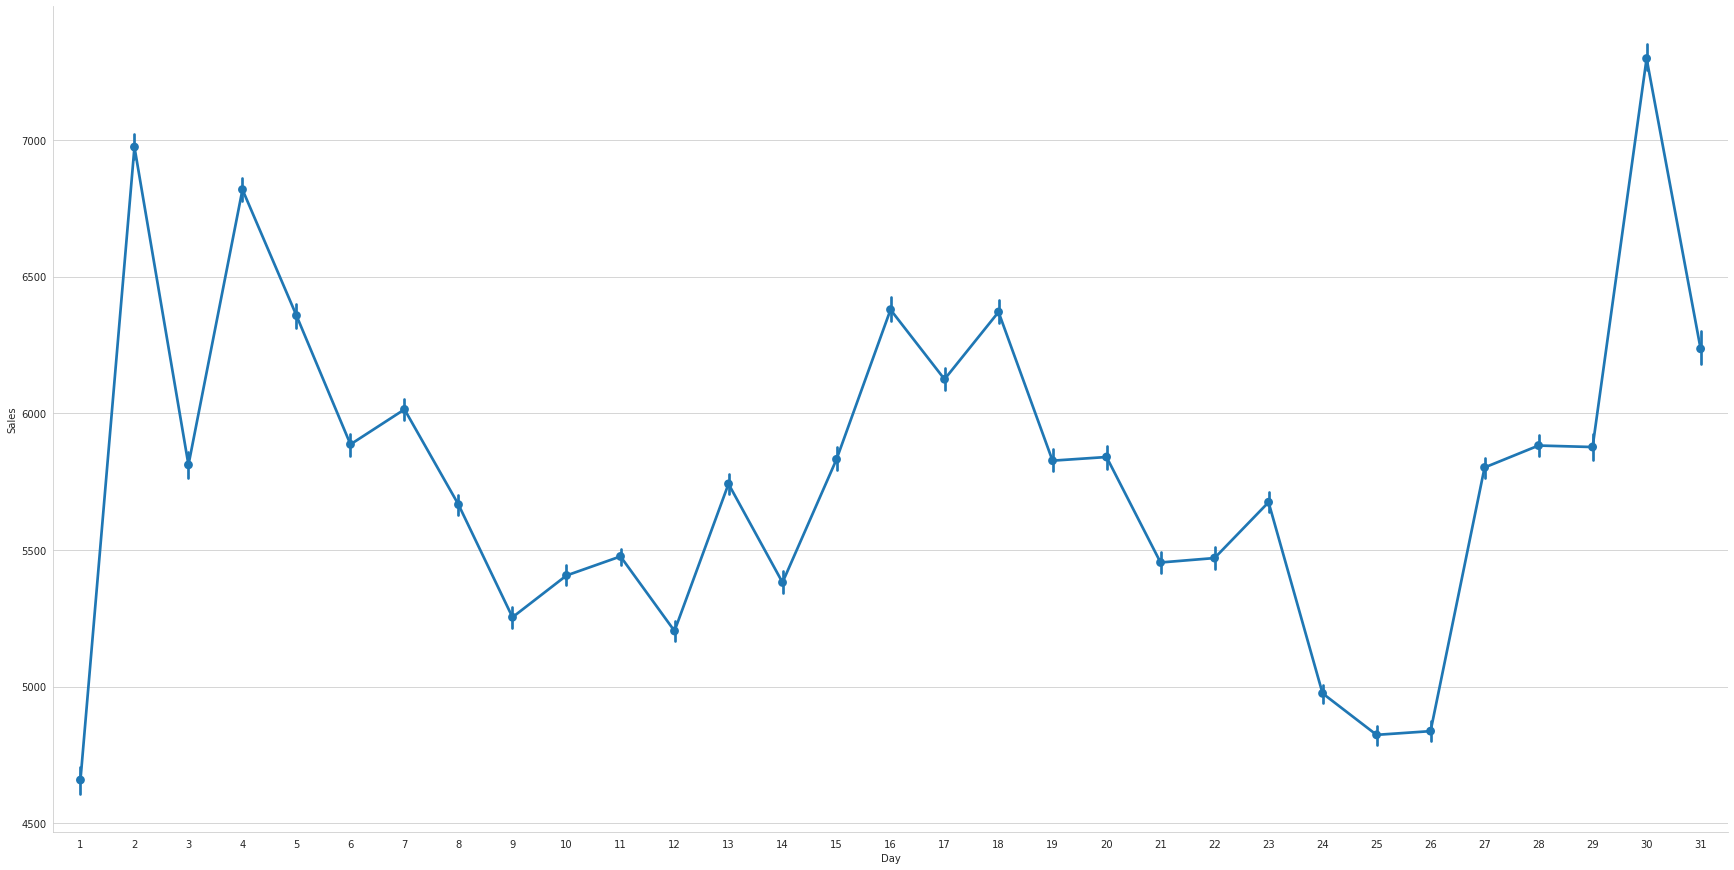

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

sns.factorplot(x='Day' , y='Sales', data=df, kind="point", aspect=2,size=12)

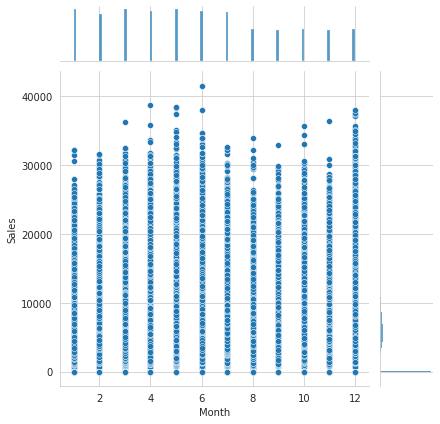

In [ ]:
sns.jointplot(x='Month' , y='Sales', data=df)

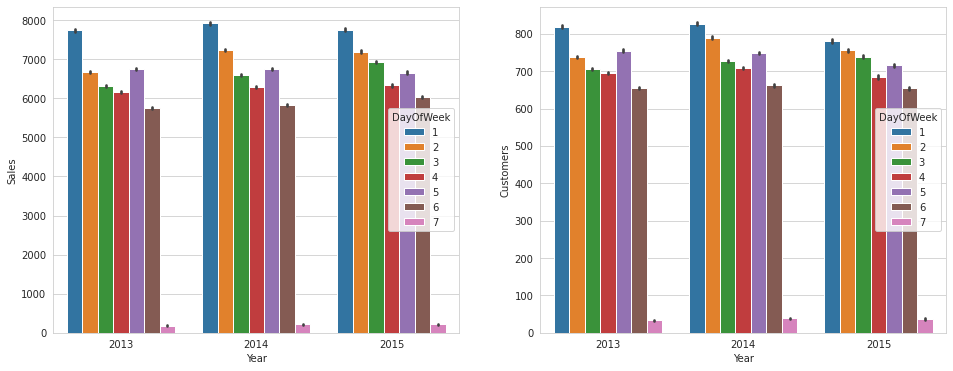

In [ ]:

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x='Year', y='Sales' , hue='DayOfWeek',data=df, ax=axes[0]);
sns.barplot(x='Year' , y='Customers', hue='DayOfWeek',data=df, ax=axes[1]);

Running a promo positively affects on sales.
If promo is there the average sales are up by 75%.


In [ ]:
df.groupby('Promo')['Sales'].mean()

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

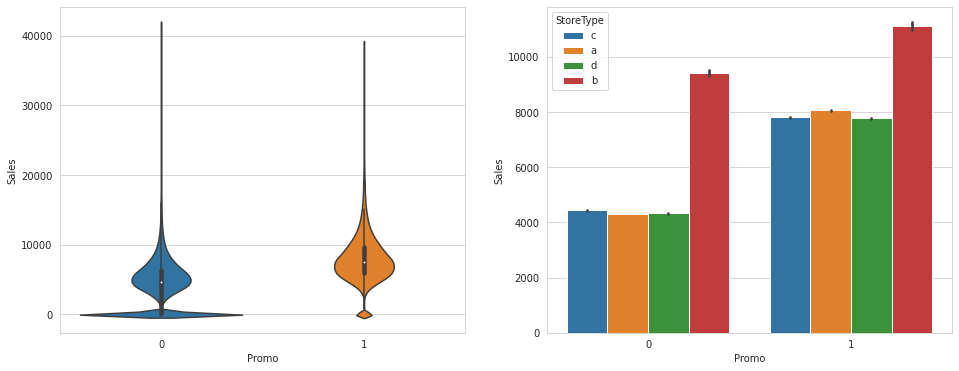

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x='Promo', y='Sales', data=df , ax=axes[0]);
sns.barplot(x='Promo' , y='Sales', hue='StoreType',data=df, ax=axes[1]);

Maximum number of stores are of store type A.

But average sales of store B is double as compared to all other stores.

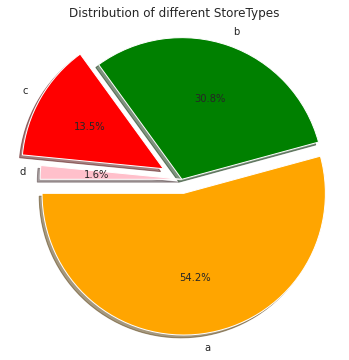

In [ ]:

labels = 'a' , 'b' , 'c' , 'd'
sizes = df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


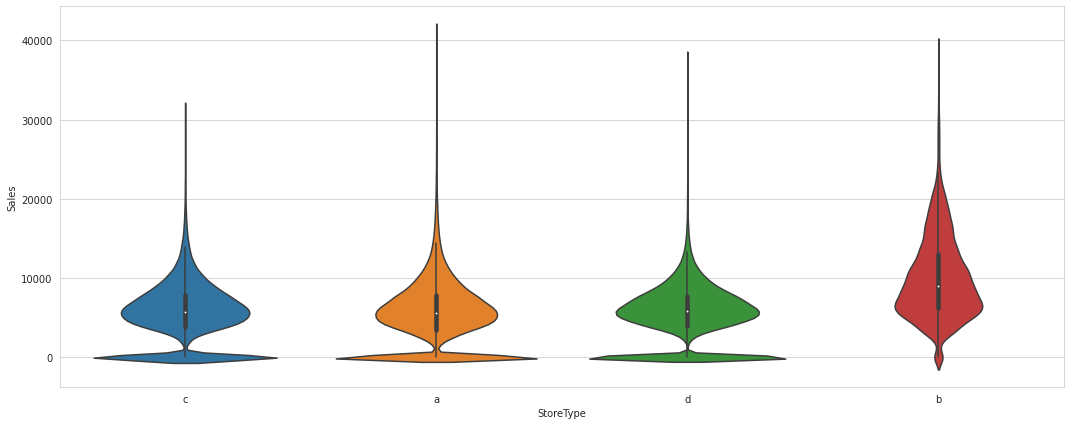

In [ ]:
print(df.groupby('StoreType')['Sales'].mean())
print(sns.violinplot( x='StoreType' , y='Sales' , data=df))

Assortment B has highest avg of sales

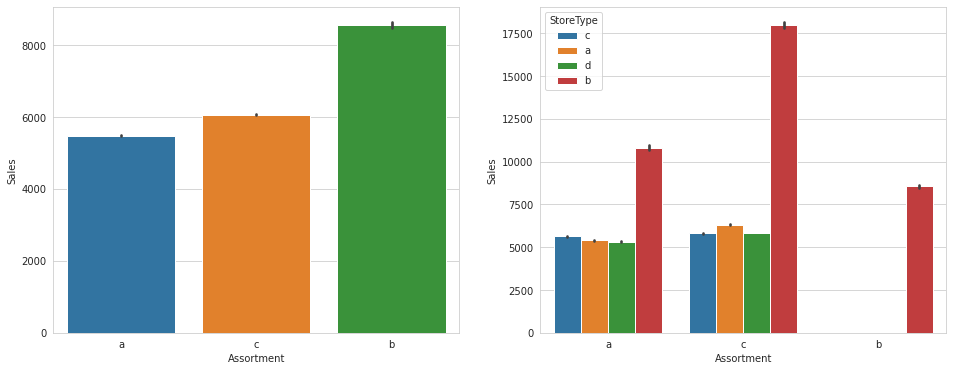

In [ ]:

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.barplot(x='Assortment', y='Sales', data=df , ax = axes[0])
sns.barplot(x='Assortment', y='Sales', data=df ,hue="StoreType", ax = axes[1])


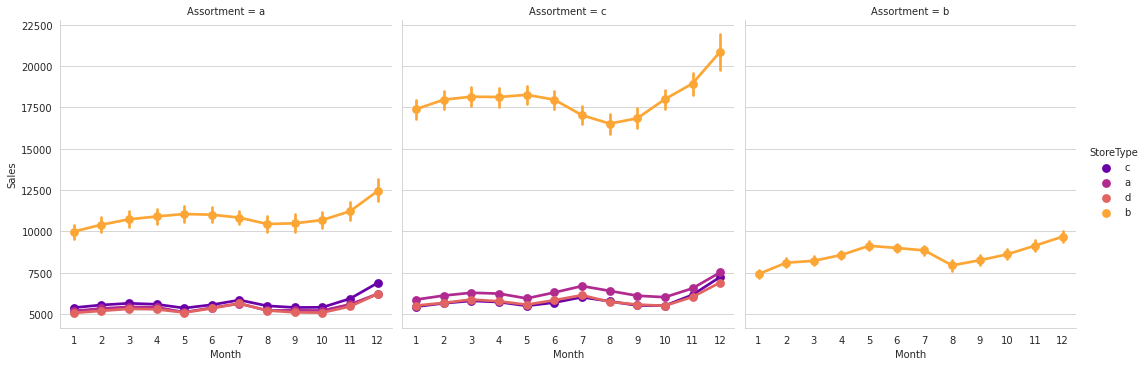

In [ ]:
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')


## <b> FEATURE SELECTION </b>

After EDA we will do feature selection.

First we will do it on numerical columns then on categorical columns.

Feature selection on numerical columns

Will consider month, date , week as numerical variable as it has many categories



In [ ]:
columns= ['Customers','Month','Day','CompetitionDistance', 'CompetitionOpenSinceMonth' , 'CompetitionOpenSinceYear' , 'Promo2SinceWeek' , 'Sales' ]

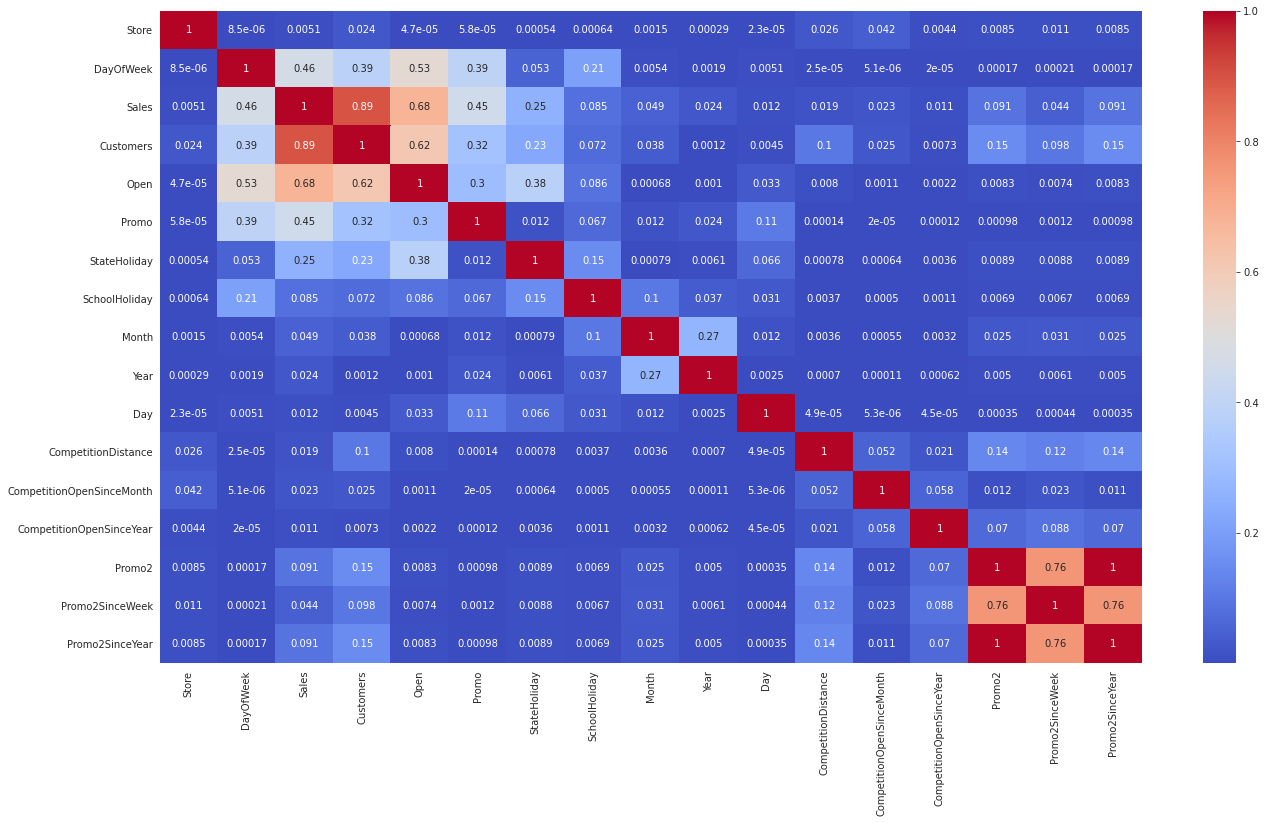

In [ ]:
plt.figure(figsize=(22,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in columns]])

,variables,VIF
0,Customers,15.282573
1,Month,4.104995
2,Day,4.195076
3,CompetitionDistance,1.597812
4,CompetitionOpenSinceMonth,8.291103
5,CompetitionOpenSinceYear,18.758798
6,Promo2SinceWeek,1.650643
7,Sales,17.024499


Will remove CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear since it has very low corelation with independent variable sales (<0.03)

In [ ]:
columns= ['Customers','Month','Day', 'Promo2SinceWeek' , 'Sales' ]
calc_vif(df[[i for i in columns]])

,variables,VIF
0,Customers,14.551426
1,Month,2.939733
2,Day,2.873800
3,Promo2SinceWeek,1.483269
4,Sales,16.046747


Month , day , promo2sinceweek also have low correlation with sales ( <0.05) hence we will remove them

In [ ]:
columns= ['Customers','Sales' ]
calc_vif(df[[i for i in columns]])

,variables,VIF
0,Customers,14.319467
1,Sales,14.319467


vif of 10 is considered good but since 14 is not so far away from  10 we have considered it . From categorical variables we ahve finalised customers feature.

Feature scaling on categorical features

In [13]:
cat_columns= [ 'DayOfWeek' , 'Open' , 'Promo' , 'StateHoliday' , 'SchoolHoliday' , 'Year' , 'StoreType' , 'Assortment' , 'Promo2' ]

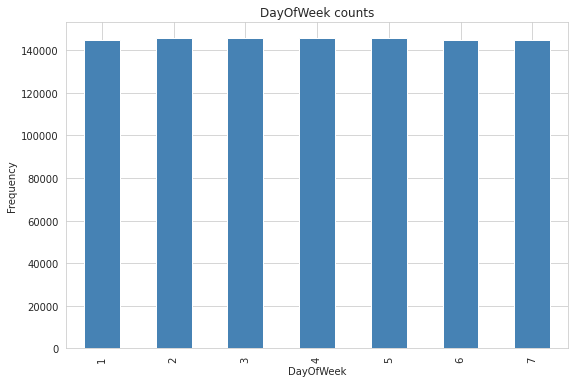

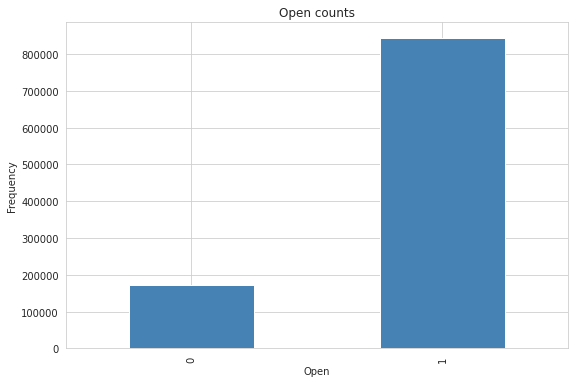

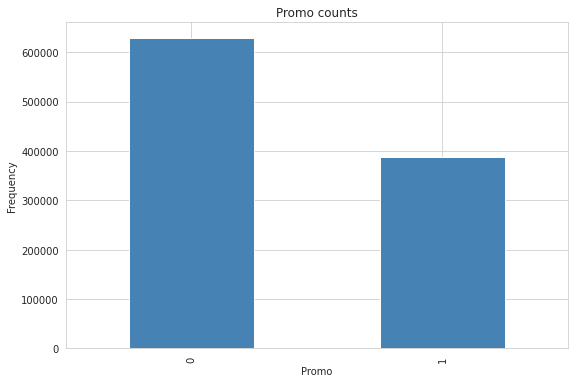

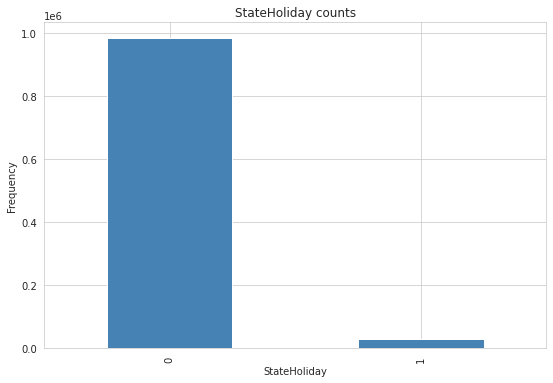

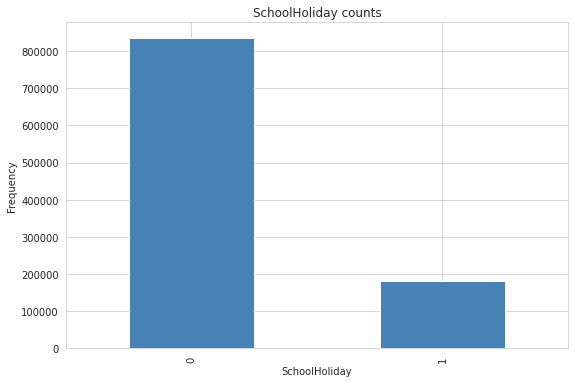

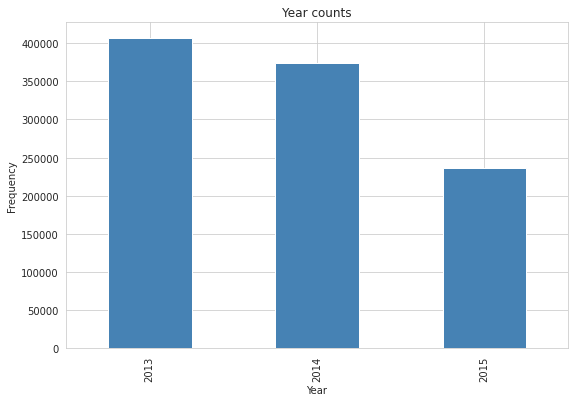

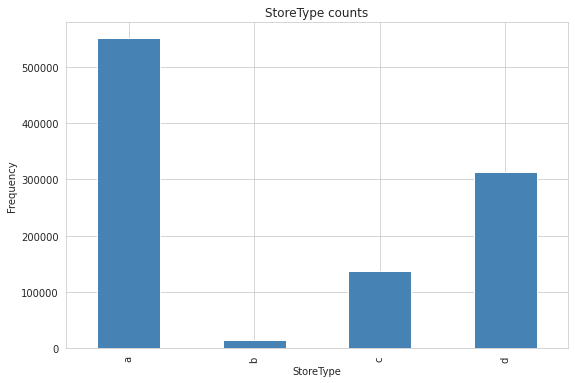

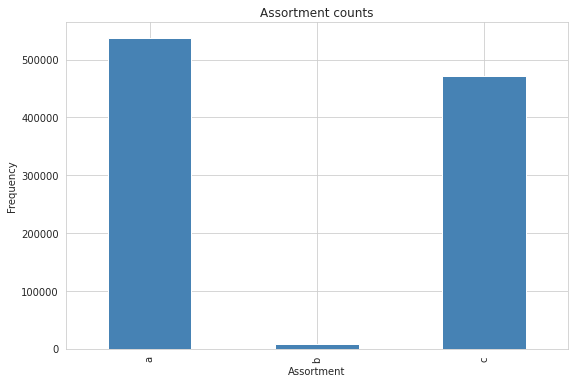

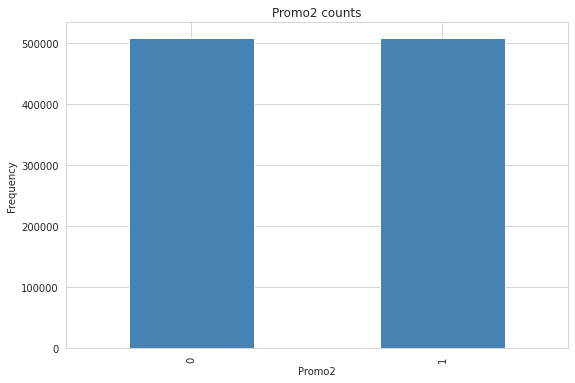

In [ ]:
for col in cat_columns:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

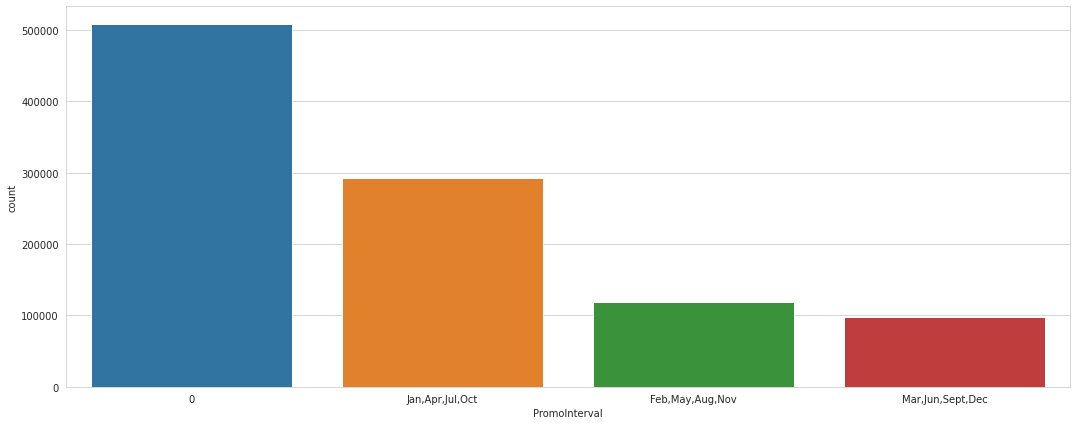

In [ ]:
sns.countplot(x='PromoInterval'  ,  data=df)

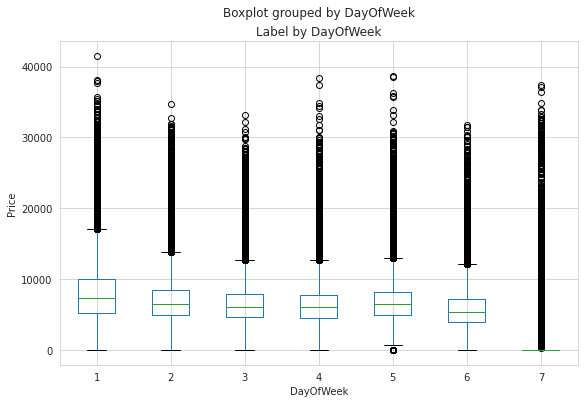

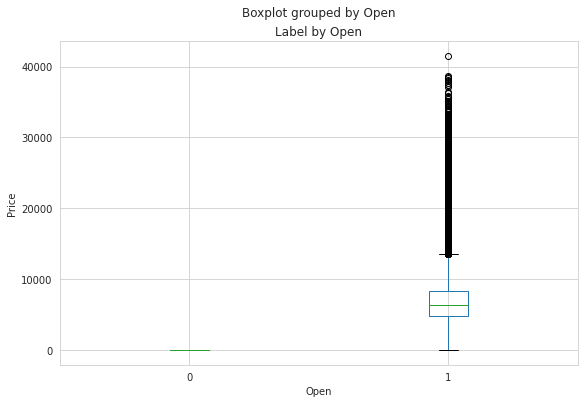

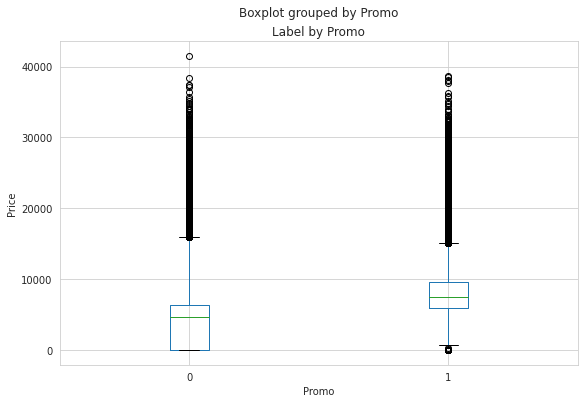

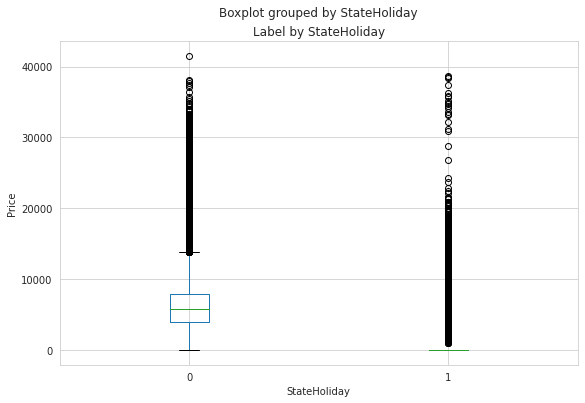

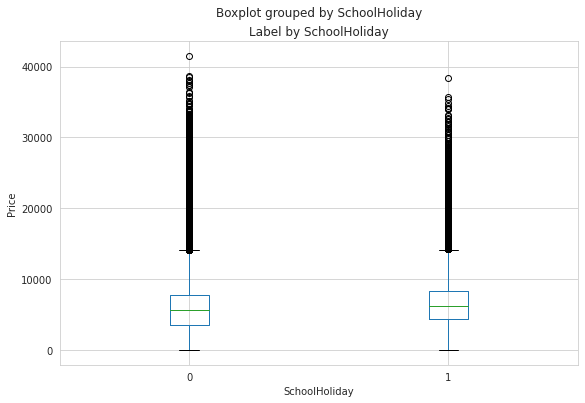

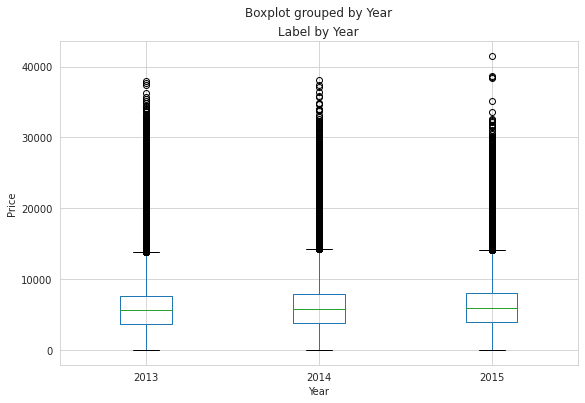

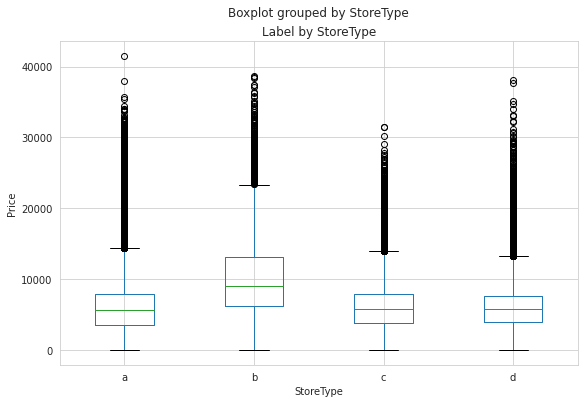

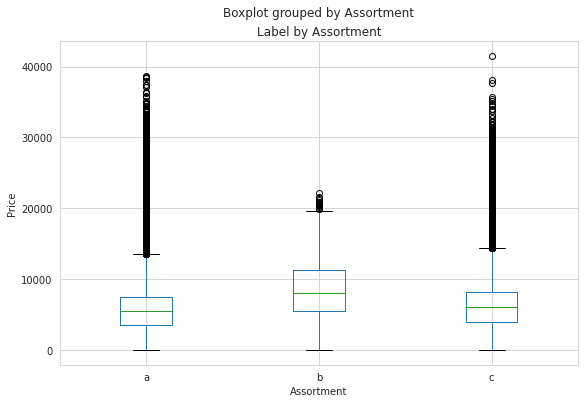

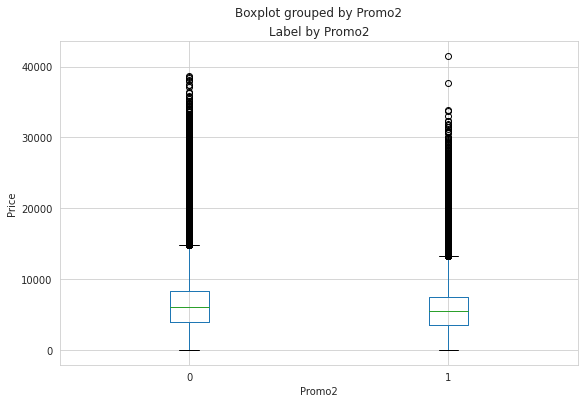

In [ ]:
for col in cat_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

In [14]:
ccolumns= [ 'Customers', 'DayOfWeek' , 'Open' , 'Promo' , 'StateHoliday' , 'SchoolHoliday' , 'Year' , 'StoreType' , 'Assortment' , 'Promo2', 'PromoInterval' , 'Sales' ]

In [15]:
dataset= df[ccolumns]
dataset.head()

,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,Promo2,PromoInterval,Sales
0,555,5,1,1,0,1,2015,c,a,0,0,5263
1,625,5,1,1,0,1,2015,a,a,1,"Jan,Apr,Jul,Oct",6064
2,821,5,1,1,0,1,2015,a,a,1,"Jan,Apr,Jul,Oct",8314
3,1498,5,1,1,0,1,2015,c,c,0,0,13995
4,559,5,1,1,0,1,2015,a,a,0,0,4822


Doing one hot encoding for required columns

In [16]:
dataset = pd.get_dummies(dataset, columns=["StoreType", "Assortment","PromoInterval"], prefix=["s_type", "assort_type","p_Interval"])

In [17]:
dataset.head()

,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Promo2,Sales,s_type_a,s_type_b,s_type_c,s_type_d,assort_type_a,assort_type_b,assort_type_c,p_Interval_0,"p_Interval_Feb,May,Aug,Nov","p_Interval_Jan,Apr,Jul,Oct","p_Interval_Mar,Jun,Sept,Dec"
0,555,5,1,1,0,1,2015,0,5263,0,0,1,0,1,0,0,1,0,0,0
1,625,5,1,1,0,1,2015,1,6064,1,0,0,0,1,0,0,0,0,1,0
2,821,5,1,1,0,1,2015,1,8314,1,0,0,0,1,0,0,0,0,1,0
3,1498,5,1,1,0,1,2015,0,13995,0,0,1,0,0,0,1,1,0,0,0
4,559,5,1,1,0,1,2015,0,4822,1,0,0,0,1,0,0,1,0,0,0


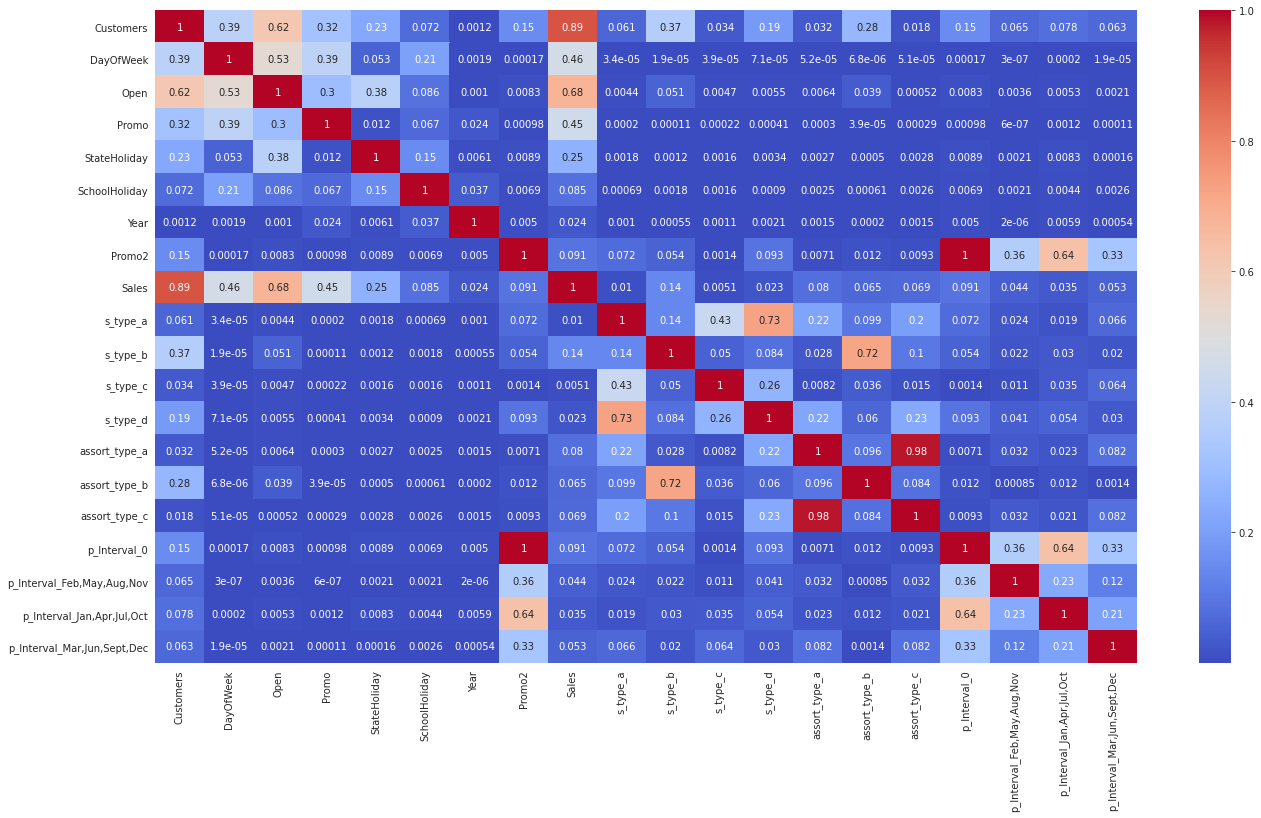

In [ ]:
plt.figure(figsize=(22,12))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [18]:
dataset = dataset.apply(pd.to_numeric)

In [19]:
dataset['Sales'] = dataset['Sales'].astype(float)

In [20]:
X = dataset.loc[:, dataset.columns != 'Sales']
y = dataset['Sales']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head()

,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Promo2,s_type_a,s_type_b,s_type_c,s_type_d,assort_type_a,assort_type_b,assort_type_c,p_Interval_0,"p_Interval_Feb,May,Aug,Nov","p_Interval_Jan,Apr,Jul,Oct","p_Interval_Mar,Jun,Sept,Dec"
635787,648,1,1,0,0,0,2013,1,0,0,1,0,1,0,0,0,0,1,0
621011,0,7,0,0,0,0,2013,0,0,0,0,1,0,0,1,1,0,0,0
69929,476,6,1,0,0,0,2015,0,0,0,0,1,1,0,0,1,0,0,0
53248,0,7,0,0,0,0,2015,1,1,0,0,0,1,0,0,0,1,0,0
658989,557,1,1,1,0,0,2013,0,0,0,0,1,0,0,1,1,0,0,0



## <b> BUILDING DIFFERENT MACHINE LEARNING MODELS</b>

LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(X_train, y_train)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

In [31]:
print("Regresion Model Score" , ":" , linreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(X_test, y_test))

y_train_pred_lr = linreg.predict(X_train)
y_test_pred_lr = linreg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_train_pred_lr),
      "Testing RMSE", ":", rmse(y_test, y_test_pred_lr))

Regresion Model Score : 0.8980411353747674 , Out of Sample Test Score : 0.8983205251368941
Training RMSE : 1229.7872713818672 Testing RMSE : 1225.7613138742954


LASSCO REGULARIZATION

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
lasso.fit(X_train, y_train)



Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("Regresion Model Score" , ":" , lasso.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , lasso.score(X_test, y_test))

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_train_pred_lasso),
      "Testing RMSE", ":", rmse(y_test, y_test_pred_lasso))

Regresion Model Score : 0.8980409907278152 , Out of Sample Test Score : 0.8983199027318256
Training RMSE : 1229.7881437185613 Testing RMSE : 1225.765065461762


DECISION TREE 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=15)
treereg = tree.fit(X_train, y_train)

In [ ]:
print("Regresion Model Score" , ":" , treereg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(X_test, y_test))

y_train_pred_dec = treereg.predict(X_train)
y_test_pred_dec = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_train_pred_dec),
      "Testing RMSE", ":", rmse(y_test, y_test_pred_dec))


Regresion Model Score : 0.936874430221062 , Out of Sample Test Score : 0.9221395099061742
Training RMSE : 967.6541285527702 Testing RMSE : 1072.62478949871


RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=35)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:

print("Regresion Model Score" , ":" , rdfreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(X_test, y_test))   

y_train_pred_rd = rdfreg.predict(X_train)
y_test_pred_rd = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_train_pred_rd),
      "Testing RMSE", ":", rmse(y_test, y_test_pred_rd))


Regresion Model Score : 0.9697701164847603 , Out of Sample Test Score : 0.9098211290910023
Training RMSE : 669.6312843830948 Testing RMSE : 1154.3610377083041


WE GET MAXIMUM ACCURACY IN DECISION TREE. 

EVEN LEAST RMSE IS FOUND IN DECISION TREE. 

HENCE HYPERPARAMETER TUNING AND CROSS VALIDATION WILL BE DONE ON DECISION TREE MODEL.

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation

tree = DecisionTreeRegressor()
parameters = {'min_samples_leaf': [10,15,20,25,30]}
DCR= GridSearchCV(tree, parameters,scoring='neg_mean_squared_error', cv=5)
DCR.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': [10, 15, 20, 25, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [ ]:
print("The best fit alpha value is found out to be :" ,DCR.best_params_)
print("\nUsing ",DCR.best_params_, " the negative mean squared error is: ", DCR.best_score_)

The best fit alpha value is found out to be : {'min_samples_leaf': 30}

Using  {'min_samples_leaf': 30}  the negative mean squared error is:  -1120878.6282563894


We applied decision tree again after hyperparameter tuning where we found optimal value for parameter  min_samples_leaf as 30.

After putting that value in decision tree model its accuracy is increased from 92.22 to 92.46 ; and rmse value is decreased to 1055 from 1072.

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=30)
treereg = tree.fit(X_train, y_train)


print("Regresion Model Score" , ":" , treereg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(X_test, y_test))

y_train_pred_dec = treereg.predict(X_train)
y_test_pred_dec = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_train_pred_dec),
      "Testing RMSE", ":", rmse(y_test, y_test_pred_dec))

Regresion Model Score : 0.9327210116149707 , Out of Sample Test Score : 0.9246501858653463
Training RMSE : 998.9809917243165 Testing RMSE : 1055.1892447242933


In [36]:
from sklearn import metrics

print('Mean absolute error is : ',metrics.mean_absolute_error(y_test, y_test_pred_dec))        #mae
print('Mean squared error is : ',metrics.mean_squared_error(y_test, y_test_pred_dec))         #mse
print('Root mean squared error is : ',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dec)))  #rmse

Mean absolute error is :  703.5448578878929
Mean squared error is :  1113424.3421818244
Root mean squared error is :  1055.1892447242933


In [38]:
aa= pd.DataFrame({'Actual Value':y_test , 'Predicted Value':y_test_pred_dec })
aa.head(10)

,Actual Value,Predicted Value
982497,7285.0,6854.500000
719065,6221.0,6470.122807
145542,8132.0,8991.363636
252177,20916.0,14862.323529
479489,5472.0,7195.066667
842412,5646.0,4913.567568
73679,8538.0,8891.258065
1006795,5318.0,5515.516129
191879,7018.0,6143.558824
641675,7523.0,7273.675676


Text(0.5, 0, 'Relative Importance')

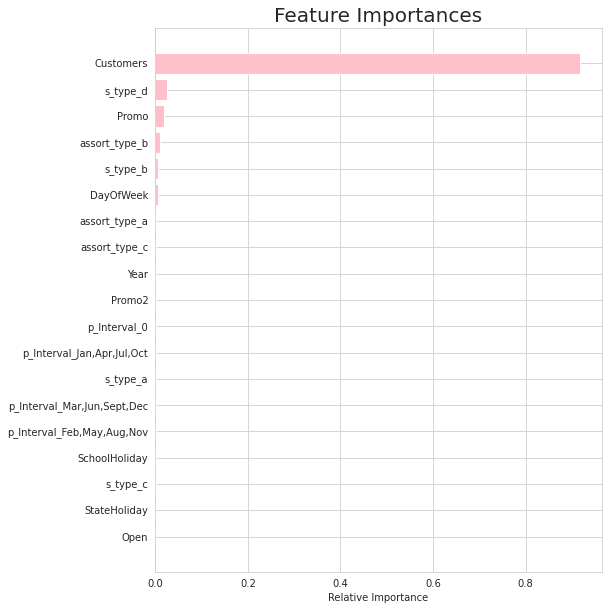

In [ ]:
features = X_train.columns
importances = treereg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')